# Paired Associate Learning Task - learning score calculation + visualization subjectwise

## Step1: select your file
<br>
1. first cell: copy the path of your files to the first line (don't forget the ""-s, and, you windows users out there - you need to change all of your backslash (\) signs to slash (/)!) <br>
2. first cell: copy the name of your file(s) to the second line, keep the ""s and the []s, even if you have only one file <br>
3. second cell: it will just set your working directory to the one you set as path.

In [4]:
path = "C:/Users/ASUS/BML-MEMO LAB Dropbox/bml memo members/Orsi_Pesthy/_tACS/feedback_for_participants"

edataaided_txt_files = ["PALT1_edataaided.txt", "PALT2_edataaided.txt"]


In [5]:
#import packages
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
os.chdir(path)

4. reading the file(s)

In [7]:
for i in range(len(edataaided_txt_files)):
    df = pd.read_csv(edataaided_txt_files[i], delimiter = "\t")
    columns_needed = ["Subject", "Session", "TESZTINGER.ACC", "TESZTINGER.RESP", "TipusTESZT"]
    if "PROBA" in df:
        columns_needed.append("PROBA")
    else:
        df["PROBA"] = 0
    df = df[columns_needed]
    if i > 0:
        raw_data = pd.concat([raw_data, df])
    else:
        raw_data = df
    


let's take a look at it. You should see 6 columns and N x Session nr x trial nr rows.

In [8]:
print(raw_data.shape)
raw_data.head(30)

(235, 6)


,Subject,Session,TESZTINGER.ACC,TESZTINGER.RESP,TipusTESZT,PROBA
0,100,1,NaN,NaN,NaN,1.0
1,100,1,NaN,NaN,NaN,1.0
2,100,1,NaN,NaN,NaN,1.0
3,100,1,NaN,NaN,NaN,1.0
4,100,1,NaN,NaN,NaN,1.0
5,100,1,1.0,5.0,rre,NaN
6,100,1,1.0,4.0,rru,NaN
7,100,1,0.0,5.0,rru,NaN
8,100,1,1.0,3.0,ur,NaN
9,100,1,1.0,5.0,rre,NaN


## get some cleaning done <br><br>
Exclude familiarization (PROBA) trials

In [9]:


raw_data_filt = raw_data[raw_data["PROBA"] != 1]
print(raw_data_filt.shape)
raw_data_filt.head()


(200, 6)


,Subject,Session,TESZTINGER.ACC,TESZTINGER.RESP,TipusTESZT,PROBA
5,100,1,1.0,5.0,rre,NaN
6,100,1,1.0,4.0,rru,NaN
7,100,1,0.0,5.0,rru,NaN
8,100,1,1.0,3.0,ur,NaN
9,100,1,1.0,5.0,rre,NaN


## prep data for pivoting  <br>
(you can just run these cells mindlessly, they are supposed to work properly without any changes)

In [10]:
raw_data_to_piv = raw_data_filt.copy()

In [11]:
raw_data_to_piv['rr_t_rru'] = np.where(np.logical_and(raw_data_filt['TESZTINGER.RESP']>3, raw_data_filt['TipusTESZT'] == 'rru'), 1, 0)
raw_data_to_piv['rr_t_uu'] = np.where(np.logical_and(raw_data_filt['TESZTINGER.RESP']>3, raw_data_filt['TipusTESZT'] == 'uu'),1,0)
raw_data_to_piv['rr_t_rre'] = np.where(np.logical_and(raw_data_filt['TESZTINGER.RESP']>3, raw_data_filt['TipusTESZT'] == 'rre'),1,0)
raw_data_to_piv['rre_t_rre'] = np.where(np.logical_and(raw_data_filt['TESZTINGER.RESP']==5, raw_data_filt['TipusTESZT'] == 'rre'),1,0)
raw_data_to_piv['rre_t_rru'] = np.where(np.logical_and(raw_data_filt['TESZTINGER.RESP']==5, raw_data_filt['TipusTESZT'] == 'rru'),1,0)



In [12]:
raw_data_to_piv['nr_rre'] = np.where(raw_data_filt['TipusTESZT']=="rre",1,0)
raw_data_to_piv['nr_rru'] = np.where(raw_data_filt['TipusTESZT']=="rru",1,0)
raw_data_to_piv['nr_uu'] = np.where(raw_data_filt['TipusTESZT']=="uu",1,0)



,Subject,Session,TESZTINGER.ACC,TESZTINGER.RESP,TipusTESZT,PROBA,rr_t_rru,rr_t_uu,rr_t_rre,rre_t_rre,rre_t_rru,nr_rre,nr_rru,nr_uu
5,100,1,1.0,5.0,rre,NaN,0,0,1,1,0,1,0,0
6,100,1,1.0,4.0,rru,NaN,1,0,0,0,0,0,1,0
7,100,1,0.0,5.0,rru,NaN,1,0,0,0,1,0,1,0
8,100,1,1.0,3.0,ur,NaN,0,0,0,0,0,0,0,0
9,100,1,1.0,5.0,rre,NaN,0,0,1,1,0,1,0,0
10,100,1,1.0,1.0,uu,NaN,0,0,0,0,0,0,0,1
11,100,1,1.0,3.0,ur,NaN,0,0,0,0,0,0,0,0
12,100,1,0.0,5.0,rru,NaN,1,0,0,0,1,0,1,0
13,100,1,1.0,3.0,ur,NaN,0,0,0,0,0,0,0,0
14,100,1,0.0,5.0,rru,NaN,1,0,0,0,1,0,1,0


Let's take a look at it again: you should see some new columns called rr_t_rru, rr_t_uu, rr_t_rre, rre_t_rre, rre_t_rru, nr_rre, nr_rru, nr_uu

In [ ]:
raw_data_to_piv.head(30)

Now, let's sum it up by subject and session!

In [13]:
dat_to_sum = raw_data_to_piv.pivot_table(index=['Subject', 'Session'], columns=None, values=['TESZTINGER.ACC','rr_t_rru', 'rr_t_uu', 'rr_t_rre', 'rre_t_rre', 'rre_t_rru', 'nr_rre', 'nr_rru', 'nr_uu'], aggfunc=np.sum).reset_index()
dat_to_sum



,Subject,Session,TESZTINGER.ACC,nr_rre,nr_rru,nr_uu,rr_t_rre,rr_t_rru,rr_t_uu,rre_t_rre,rre_t_rru
0,99,1,17.0,6,6,6,6,6,0,6,5
1,99,2,4.0,2,2,2,1,0,0,1,0
2,100,1,20.0,6,6,6,6,6,0,6,4
3,100,2,7.0,2,2,2,2,1,0,2,0
4,101,1,19.0,6,6,6,6,6,0,6,3
5,102,1,17.0,6,6,6,6,6,0,2,3
6,103,1,18.0,6,6,6,6,6,0,4,4
7,104,1,20.0,6,6,6,6,5,0,5,1
8,104,2,6.0,2,2,2,2,2,0,2,2
9,105,1,16.0,6,6,6,5,6,0,5,5


## now it's time to calculate learning scores <br>
it will calculate item memory, automatic association and recollection scores for each subjects, each sessions.

In [14]:
dat_final = dat_to_sum.copy()

In [15]:
#calc cols to calc indeces from
#rr to rru, rr to uu, rr to rre, rr to rru, rre to rre, rre to rru
dat_final['item'] = dat_to_sum['rr_t_rru']/dat_to_sum['nr_rru'] - dat_to_sum['rr_t_uu']/dat_to_sum['nr_uu']
dat_final['assoc'] = dat_to_sum['rr_t_rre']/dat_to_sum['nr_rre'] - dat_to_sum['rr_t_rru']/dat_to_sum['nr_rru']
dat_final['recoll'] = dat_to_sum['rre_t_rre']/dat_to_sum['nr_rre'] - dat_to_sum['rre_t_rru']/dat_to_sum['nr_rru']

In [16]:
dat_final.head()

,Subject,Session,TESZTINGER.ACC,nr_rre,nr_rru,nr_uu,rr_t_rre,rr_t_rru,rr_t_uu,rre_t_rre,rre_t_rru,item,assoc,recoll
0,99,1,17.0,6,6,6,6,6,0,6,5,1.0,0.0,0.166667
1,99,2,4.0,2,2,2,1,0,0,1,0,0.0,0.5,0.500000
2,100,1,20.0,6,6,6,6,6,0,6,4,1.0,0.0,0.333333
3,100,2,7.0,2,2,2,2,1,0,2,0,0.5,0.5,1.000000
4,101,1,19.0,6,6,6,6,6,0,6,3,1.0,0.0,0.500000


The next cell will write it to an excel file and save it to your working directory you copied in the first cell

In [17]:
dat_final.to_excel("declarative_data.xlsx")

# Visualize by participant
<br>
This one can be used if you: <br> 1. want to visualize data for each subjects separately, <br> 2. have more than one sessions.

So sorry, this won't be very universal, if you wanna use it on your own data you might need to adjust the code.

In [18]:
#melt 
to_plot = pd.melt(dat_final, id_vars=['Subject', 'Session'], value_vars=['item', 'assoc', 'recoll'])
to_plot.sort_values(by=['Subject', 'Session']).reset_index(drop=True)

,Subject,Session,variable,value
0,99,1,item,1.000000
1,99,1,assoc,0.000000
2,99,1,recoll,0.166667
3,99,2,item,0.000000
4,99,2,assoc,0.500000
5,99,2,recoll,0.500000
6,100,1,item,1.000000
7,100,1,assoc,0.000000
8,100,1,recoll,0.333333
9,100,2,item,0.500000


In [ ]:
#if there's a group mean you want to show to your participant whether they performed better or worse, here's your chance to add it to the plots
group_mean = None


In [38]:
to_plot['value'] = to_plot['value'] + 0.005

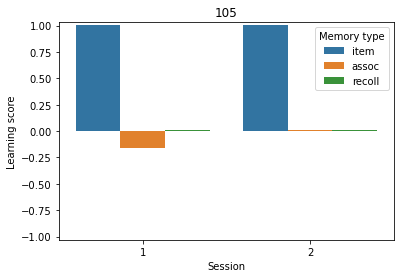

In [47]:
for subject in to_plot['Subject'].unique():
    plt.clf()
    plot_subj = sns.barplot(data=to_plot[to_plot['Subject'] == subject], x='Session', y='value', hue='variable')
    plot_subj.set(ylabel='Learning score', title = str(subject))
    plot_subj.set(ylim=(-1.03, 1.03))
    plt.legend(title='Memory type')
    fig = plot_subj.get_figure()
    fig.savefig(str(subject) + "_plottie.png")
    